# House Sales Prediction

Data from [House Sales in King County, USA](https://www.kaggle.com/harlfoxem/housesalesprediction).

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

df = pd.read_csv('data/kc_house_data.csv')

### Exploring data

In [2]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21597 entries, 0 to 21596
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             21597 non-null  int64  
 1   date           21597 non-null  object 
 2   price          21597 non-null  float64
 3   bedrooms       21597 non-null  int64  
 4   bathrooms      21597 non-null  float64
 5   sqft_living    21597 non-null  int64  
 6   sqft_lot       21597 non-null  int64  
 7   floors         21597 non-null  float64
 8   waterfront     21597 non-null  int64  
 9   view           21597 non-null  int64  
 10  condition      21597 non-null  int64  
 11  grade          21597 non-null  int64  
 12  sqft_above     21597 non-null  int64  
 13  sqft_basement  21597 non-null  int64  
 14  yr_built       21597 non-null  int64  
 15  yr_renovated   21597 non-null  int64  
 16  zipcode        21597 non-null  int64  
 17  lat            21597 non-null  float64
 18  long  

In [3]:
df.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
id,21597.0,4.580474e+09,2.876736e+09,1.000102e+06,2.123049e+09,3.904930e+09,7.308900e+09,9.900000e+09
price,21597.0,5.402966e+05,3.673681e+05,7.800000e+04,3.220000e+05,4.500000e+05,6.450000e+05,7.700000e+06
bedrooms,21597.0,3.373200e+00,9.262989e-01,1.000000e+00,3.000000e+00,3.000000e+00,4.000000e+00,3.300000e+01
bathrooms,21597.0,2.115826e+00,7.689843e-01,5.000000e-01,1.750000e+00,2.250000e+00,2.500000e+00,8.000000e+00
sqft_living,21597.0,2.080322e+03,9.181061e+02,3.700000e+02,1.430000e+03,1.910000e+03,2.550000e+03,1.354000e+04
sqft_lot,21597.0,1.509941e+04,4.141264e+04,5.200000e+02,5.040000e+03,7.618000e+03,1.068500e+04,1.651359e+06
floors,21597.0,1.494096e+00,5.396828e-01,1.000000e+00,1.000000e+00,1.500000e+00,2.000000e+00,3.500000e+00
waterfront,21597.0,7.547345e-03,8.654900e-02,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,1.000000e+00
view,21597.0,2.342918e-01,7.663898e-01,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,4.000000e+00
condition,21597.0,3.409825e+00,6.505456e-01,1.000000e+00,3.000000e+00,3.000000e+00,4.000000e+00,5.000000e+00


C:\Users\preston\anaconda3\envs\datasciencecourse\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='price', ylabel='Density'>

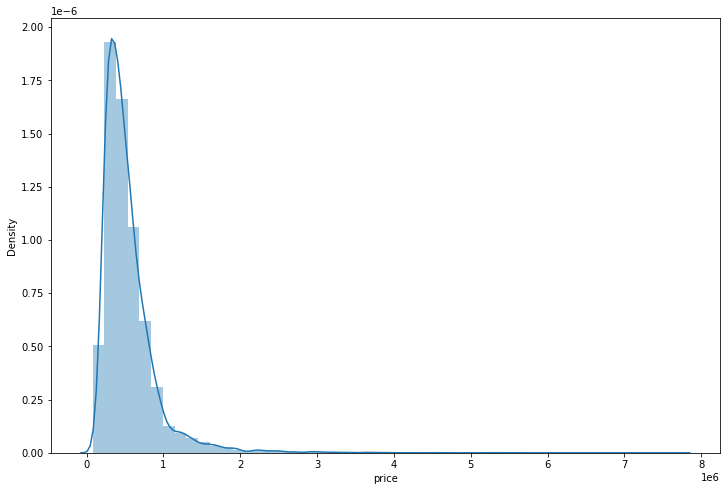

In [4]:
plt.figure(figsize=(12,8))
sns.distplot(df['price'])

C:\Users\preston\anaconda3\envs\datasciencecourse\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='bedrooms', ylabel='count'>

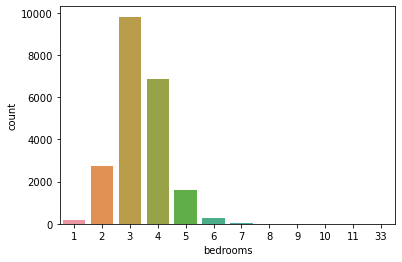

In [5]:
sns.countplot(df['bedrooms'])

In [6]:
df.corr()['price'].sort_values(ascending=False)

price            1.000000
sqft_living      0.701917
grade            0.667951
sqft_above       0.605368
sqft_living15    0.585241
bathrooms        0.525906
view             0.397370
sqft_basement    0.323799
bedrooms         0.308787
lat              0.306692
waterfront       0.266398
floors           0.256804
yr_renovated     0.126424
sqft_lot         0.089876
sqft_lot15       0.082845
yr_built         0.053953
condition        0.036056
long             0.022036
id              -0.016772
zipcode         -0.053402
Name: price, dtype: float64

<AxesSubplot:xlabel='price', ylabel='sqft_living'>

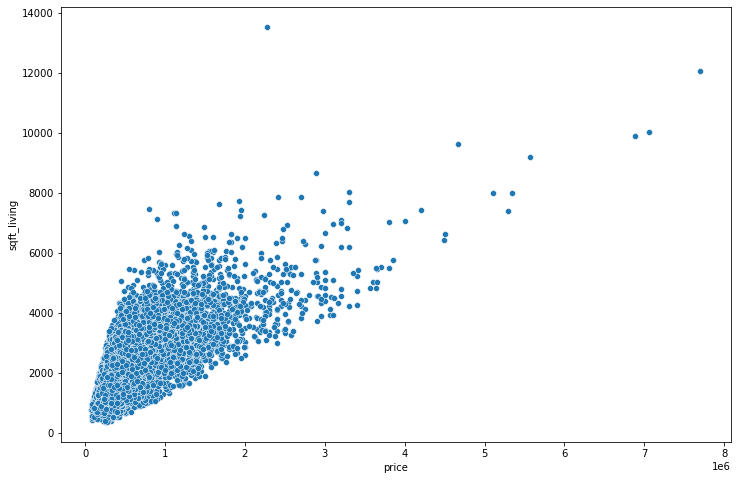

In [7]:
plt.figure(figsize=(12,8))
sns.scatterplot(x='price',y='sqft_living',data=df)

### Geographical Properties

<AxesSubplot:xlabel='price', ylabel='long'>

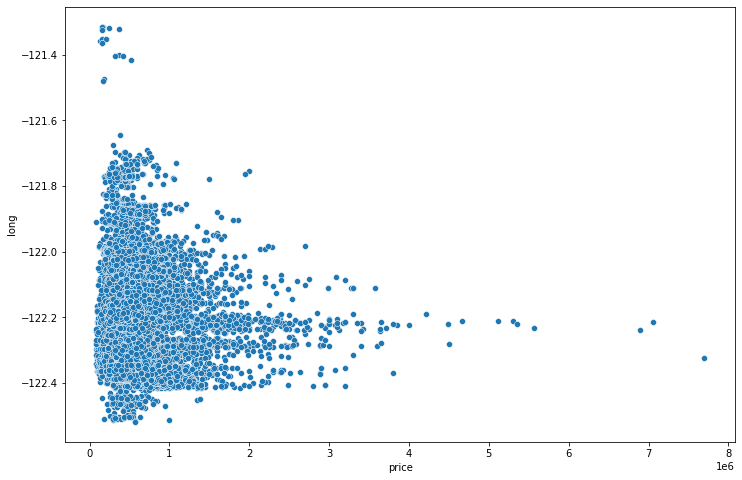

In [8]:
plt.figure(figsize=(12,8))
sns.scatterplot(x='price',y='long',data=df)

<AxesSubplot:xlabel='price', ylabel='lat'>

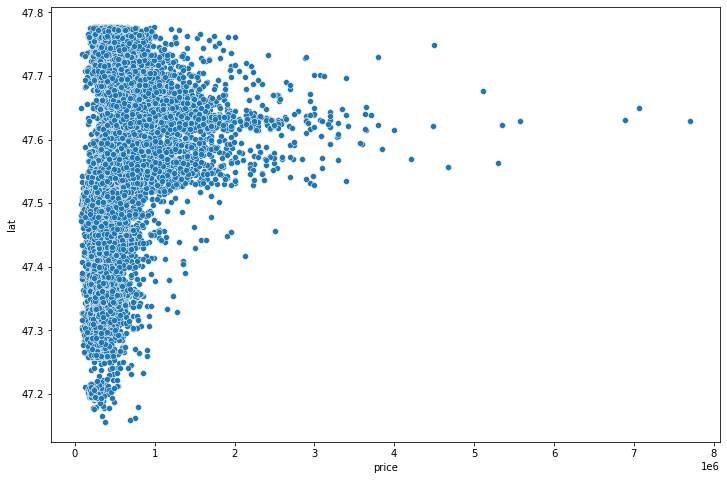

In [9]:
plt.figure(figsize=(12,8))
sns.scatterplot(x='price',y='lat',data=df)

In [10]:
non_top_1_perc = df.sort_values('price',ascending=False).iloc[int(len(df)*(0.01)):]
non_top_1_perc.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
17221,1338600225,5/28/2014,1970000.0,8,3.50,4440,6480,2.0,0,3,...,10,3140,1300,1959,0,98112,47.6310,-122.303,4440,8640
6329,824059321,6/2/2014,1970000.0,4,3.50,4370,8510,2.0,0,1,...,10,3610,760,2003,0,98004,47.5876,-122.204,2960,10347
12271,1923000260,10/15/2014,1960000.0,5,4.50,6200,23373,3.0,0,1,...,11,5050,1150,1988,0,98040,47.5632,-122.215,3700,14486
9166,3124059023,2/13/2015,1960000.0,3,1.75,3330,12566,1.0,1,4,...,8,1940,1390,1960,0,98040,47.5287,-122.220,3730,16560
12565,2806300065,4/22/2015,1960000.0,4,4.00,4430,31353,2.0,0,0,...,12,4430,0,1998,0,98005,47.6422,-122.157,3900,35237


<AxesSubplot:xlabel='long', ylabel='lat'>

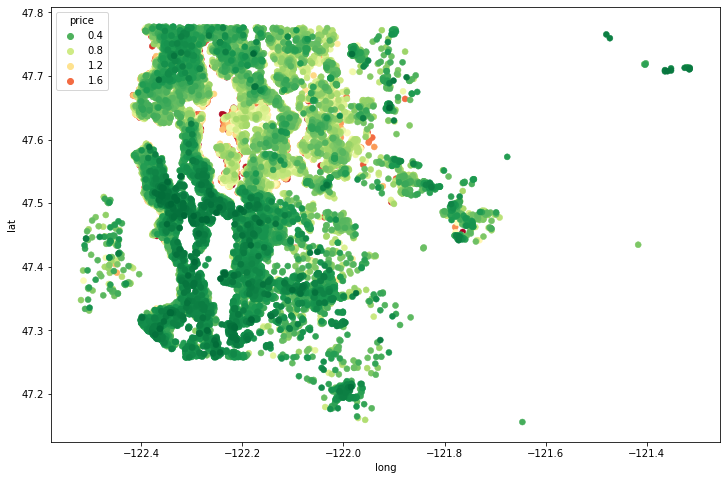

In [11]:
plt.figure(figsize=(12,8))
sns.scatterplot(x='long',y='lat',
                data=non_top_1_perc,hue='price',
                palette=plt.get_cmap('RdYlGn').reversed(),
                hue_order=False,edgecolor=None)

In [12]:
df = df.drop('id',axis=1)

df['date'] = pd.to_datetime(df['date'])
df['month'] = df['date'].apply(lambda date : date.month)
df['year'] = df['date'].apply(lambda date : date.year)
df = df.drop('date', axis=1)

<AxesSubplot:xlabel='year', ylabel='price'>

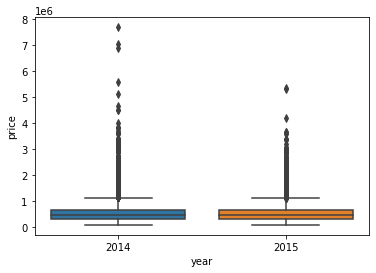

In [13]:
sns.boxplot(x='year',y='price',data=df)

<AxesSubplot:xlabel='month', ylabel='price'>

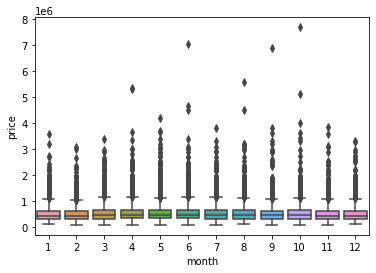

In [14]:
sns.boxplot(x='month',y='price',data=df)

In [15]:
df.columns

Index(['price', 'bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot', 'floors',
       'waterfront', 'view', 'condition', 'grade', 'sqft_above',
       'sqft_basement', 'yr_built', 'yr_renovated', 'zipcode', 'lat', 'long',
       'sqft_living15', 'sqft_lot15', 'month', 'year'],
      dtype='object')

In [16]:
df = df.drop('zipcode', axis=1)

In [17]:
df['yr_renovated'].value_counts()

0       20683
2014       91
2013       37
2003       36
2005       35
        ...  
1951        1
1959        1
1948        1
1954        1
1944        1
Name: yr_renovated, Length: 70, dtype: int64

In [18]:
df['sqft_basement'].value_counts()

0      13110
600      221
700      218
500      214
800      206
       ...  
518        1
374        1
784        1
906        1
248        1
Name: sqft_basement, Length: 306, dtype: int64

### Model

In [19]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler

X = df.drop('price',axis=1)
y = df['price']
X_train, X_test, y_train, y_test = train_test_split(
  X, y, test_size=0.3, random_state=101)

scaler = MinMaxScaler()
X_train= scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [20]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

model = Sequential()

model.add(Dense(19,activation='relu'))
model.add(Dense(19,activation='relu'))
model.add(Dense(19,activation='relu'))
model.add(Dense(19,activation='relu'))
model.add(Dense(1))

model.compile(optimizer='adam', loss='mse')

In [21]:
model.fit(x=X_train,y=y_train.values,
          validation_data=(X_test,y_test.values),
          batch_size=128,epochs=400)

Epoch 1/400
119/119 [==============================] - 1s 5ms/step - loss: 430242168832.0000 - val_loss: 418934095872.0000
Epoch 2/400
119/119 [==============================] - 0s 3ms/step - loss: 429571997696.0000 - val_loss: 416683360256.0000
Epoch 3/400
119/119 [==============================] - 0s 2ms/step - loss: 420844699648.0000 - val_loss: 396780896256.0000
Epoch 4/400
119/119 [==============================] - 0s 2ms/step - loss: 376337072128.0000 - val_loss: 320391086080.0000
Epoch 5/400
119/119 [==============================] - 0s 2ms/step - loss: 262329827328.0000 - val_loss: 180935196672.0000
Epoch 6/400
119/119 [==============================] - 0s 2ms/step - loss: 137349414912.0000 - val_loss: 101079597056.0000
Epoch 7/400
119/119 [==============================] - 0s 2ms/step - loss: 99840303104.0000 - val_loss: 94623154176.0000
Epoch 8/400
119/119 [==============================] - 0s 2ms/step - loss: 97020780544.0000 - val_loss: 93299769344.0000
Epoch 9/400
119/119 

In [22]:
losses = pd.DataFrame(model.history.history)

In [23]:
losses.head()

,loss,val_loss
0,4.302422e+11,4.189341e+11
1,4.295720e+11,4.166834e+11
2,4.208447e+11,3.967809e+11
3,3.763371e+11,3.203911e+11
4,2.623298e+11,1.809352e+11


<AxesSubplot:>

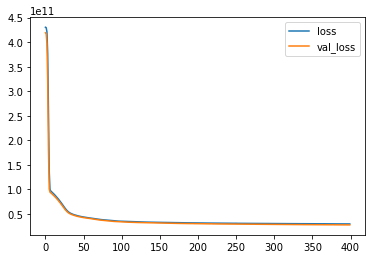

In [24]:
losses.plot()

### Evaluation

In [25]:
from sklearn.metrics import mean_squared_error,mean_absolute_error,explained_variance_score

In [26]:
X_test

array([[0.1       , 0.08      , 0.04239917, ..., 0.00887725, 0.63636364,
        0.        ],
       [0.3       , 0.36      , 0.17269907, ..., 0.00993734, 0.81818182,
        0.        ],
       [0.2       , 0.24      , 0.12512927, ..., 0.00547073, 0.90909091,
        0.        ],
       ...,
       [0.1       , 0.08      , 0.05584281, ..., 0.00506255, 1.        ,
        0.        ],
       [0.3       , 0.2       , 0.22233713, ..., 0.00774485, 0.09090909,
        1.        ],
       [0.3       , 0.32      , 0.27611169, ..., 0.0196531 , 0.45454545,
        0.        ]])

In [27]:
predictions = model.predict(X_test)

In [28]:
mean_absolute_error(y_test,predictions)

104052.22396737558

In [29]:
np.sqrt(mean_squared_error(y_test,predictions))

167142.34019310737

In [30]:
explained_variance_score(y_test,predictions)

0.789659702108452

In [31]:
df['price'].mean()

540296.5735055795

In [32]:
df['price'].median()

450000.0

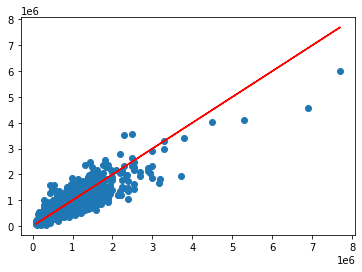

In [33]:
# Our predictions
plt.scatter(y_test,predictions)

# Perfect predictions
plt.plot(y_test,y_test,'r')

In [34]:
errors = y_test.values.reshape(6480, 1) - predictions

C:\Users\preston\anaconda3\envs\datasciencecourse\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:ylabel='Density'>

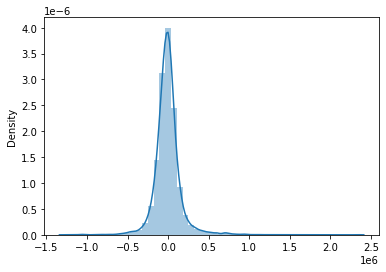

In [35]:
sns.distplot(errors)

In [36]:
single_house = df.drop('price',axis=1).iloc[0]
single_house = scaler.transform(single_house.values.reshape(-1, 19))

single_house

C:\Users\preston\anaconda3\envs\datasciencecourse\lib\site-packages\sklearn\base.py:445: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


array([[0.2       , 0.08      , 0.08376422, 0.00310751, 0.        ,
        0.        , 0.        , 0.5       , 0.4       , 0.10785619,
        0.        , 0.47826087, 0.        , 0.57149751, 0.21760797,
        0.16193426, 0.00582059, 0.81818182, 0.        ]])

In [37]:
print(model.predict(single_house))
print(df.iloc[0])

[[292311.22]]
price            221900.0000
bedrooms              3.0000
bathrooms             1.0000
sqft_living        1180.0000
sqft_lot           5650.0000
floors                1.0000
waterfront            0.0000
view                  0.0000
condition             3.0000
grade                 7.0000
sqft_above         1180.0000
sqft_basement         0.0000
yr_built           1955.0000
yr_renovated          0.0000
lat                  47.5112
long               -122.2570
sqft_living15      1340.0000
sqft_lot15         5650.0000
month                10.0000
year               2014.0000
Name: 0, dtype: float64
